# template code for operating db database

## exhibit the database

pip install CryDBkit

from CryDBkit import website

website.show('CryDB.db')

pip show CryDBkit

## acquire the structures by `Crylearn`

pip install Crylearn

In [21]:
from Crylearn import cry2graph
from ase.db import connect

database = connect('demo.db')
entry_id = 3 # acquire the third structure

node_embedding, _, dis_matrix, XRDpattern = cry2graph.parser(database, entry_id).get(model='Simulation')


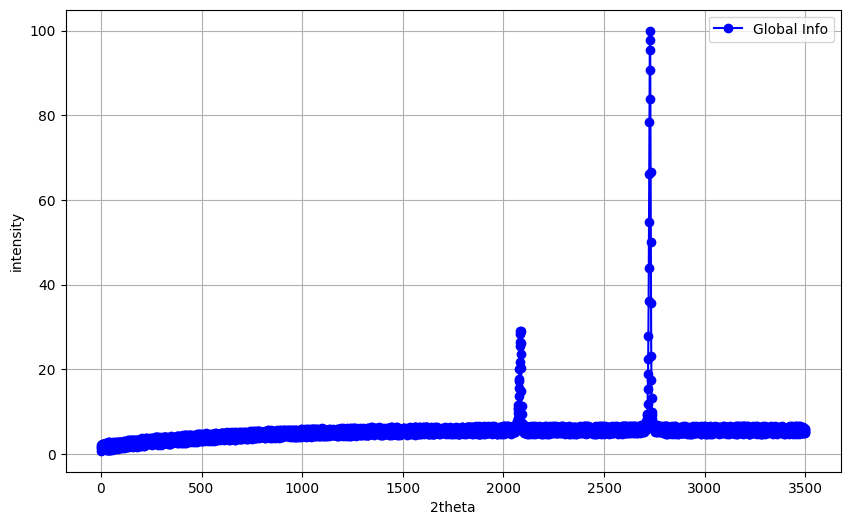

In [6]:
import matplotlib.pyplot as plt


# Plotting XRD pattern
plt.figure(figsize=(10, 6))
plt.plot(XRDpattern, marker='o', linestyle='-', color='b', label='Global Info')
plt.xlabel('2theta')
plt.ylabel('intensity')

plt.legend()
plt.grid(True)
plt.show()

In [7]:
! pip show Crylearn

Name: Crylearn
Version: 0.1.0
Summary: toolkit for embedding crystal to graphy
Home-page: 
Author: CaoBin
Author-email: bcao686@connect.hkust-gz.edu.cn
License: MIT License
Location: /Users/jacob/miniconda3/lib/python3.9/site-packages
Requires: ase, numpy, pandas, scipy, spglib
Required-by: 


## node_embedding 
+ `node_embedding` refers to the N atoms that are contained within a lattice cell. 
+ `dis_matrix` represents the pairwise distances between each pair of these atoms.


### only two atoms are contained

In [8]:
print(node_embedding.shape)
node_embedding

(2, 106)


array([[  0.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,   0.

In [10]:
print(dis_matrix.shape)
dis_matrix

(2, 2)


array([[0.        , 3.06138598],
       [3.06138598, 0.        ]])

## acquire the structures directly

In [12]:
database = connect('demo.db')
entry_id = 3 # acquire the third structure

atom = database.get_atoms(id=entry_id) # acquire atom

In [14]:
# define this function to convert cell

from ase import Atoms
import spglib

def prim2conv(prim_atom):
    """
    Convert a primitive cell to a conventional cell.

    Parameters:
        prim_atom (Atoms): The primitive atom defined in the atomic simulation unit (asu).

    Returns:
        tuple: Lattice constants, conventional lattice cell matrix in Cartesian coordinates, Atoms attribute
    """
    lattice = prim_atom.get_cell()
    positions = prim_atom.get_scaled_positions()
    numbers = prim_atom.get_atomic_numbers()
    cell = (lattice, positions, numbers)
    conventional_cell = spglib.standardize_cell(cell, to_primitive=False, no_idealize=True)
    conv_lattice, conv_positions, conv_numbers = conventional_cell
    conventional_atoms = Atoms(cell=conv_lattice, scaled_positions=conv_positions, numbers=conv_numbers, pbc=True)
    lc = conventional_atoms.cell.cellpar()
    lmtx = conventional_atoms.get_cell()[:]
    return lc, lmtx, conventional_atoms

In [20]:
G_latt_consts,_, c_atom = prim2conv(atom)

print('the lattice constant : ',G_latt_consts)

N_symbols = c_atom.get_chemical_symbols()

print('the chemical symbols :', N_symbols)

positions = c_atom.get_scaled_positions()
print('the atom fractional locations :', positions)

print('the energy of this crysal is :', database.get(id=entry_id)['formation_energy'])

the lattice constant :  [ 3.534984    3.53498355  3.53498502 89.99998912 89.99999586 90.00002197]
the chemical symbols : ['Hf', 'Hf']
the atom fractional locations : [[0.  0.  0. ]
 [0.5 0.5 0.5]]
the energy of this crysal is : 0.2121797899999933
